<a href="https://colab.research.google.com/github/NicoPatalagua/Pandas/blob/master/SimpleLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [0]:
data = pd.read_csv("Advertising.csv", index_col = 'Unnamed: 0')

In [6]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

## Simple linear regression 

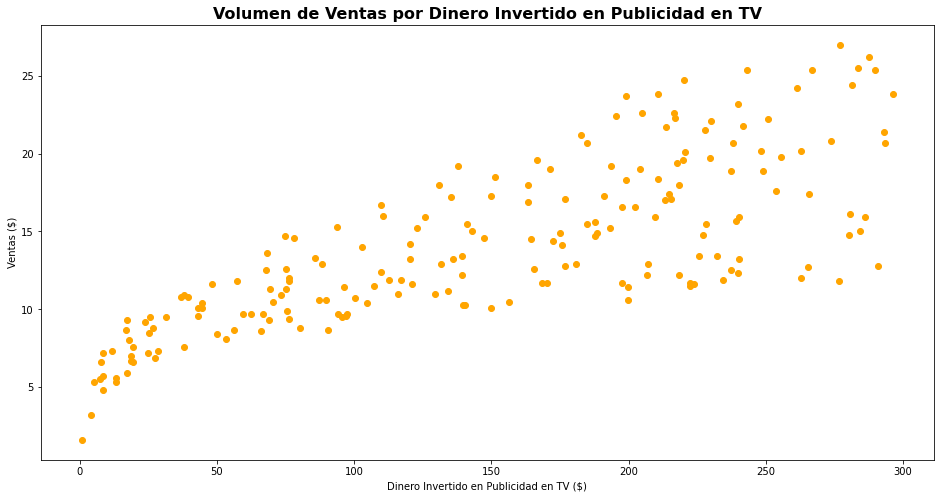

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='orange'
)
plt.title("Volumen de Ventas por Dinero Invertido en Publicidad en TV", fontsize=16, fontweight='bold')
plt.xlabel("Dinero Invertido en Publicidad en TV ($)")
plt.ylabel("Ventas ($)")
plt.show()

In [9]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("\n El modelo lineal es: Y = {:.7} + {:.5}X \n".format(reg.intercept_[0], reg.coef_[0][0]))

0.04753664043301975
7.032593549127695

 El modelo lineal es: Y = 7.032594 + 0.047537X 



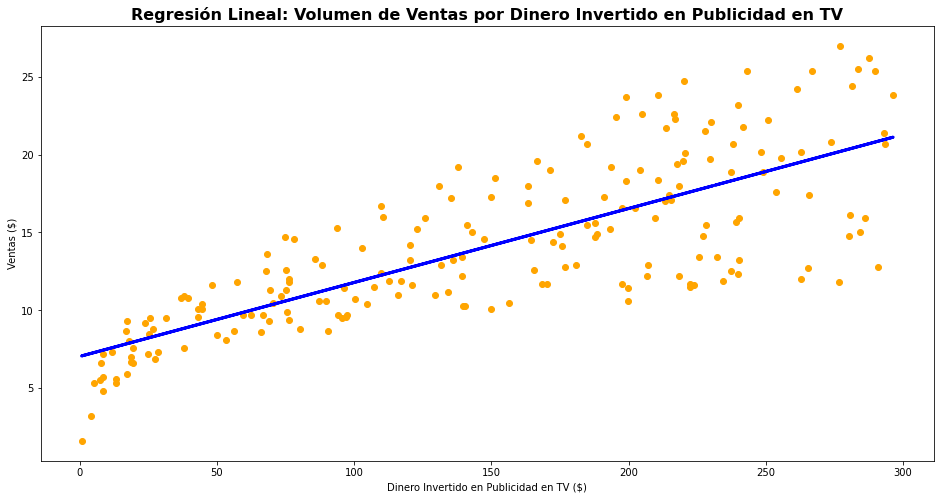

In [11]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='orange'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=3
)
plt.title("Regresión Lineal: Volumen de Ventas por Dinero Invertido en Publicidad en TV", fontsize=16, fontweight='bold')
plt.xlabel("Dinero Invertido en Publicidad en TV ($)")
plt.ylabel("Ventas ($)")
plt.show()

### Parece que una simple regresión lineal puede explicar el impacto general de la cantidad gastada en anuncios de televisión y ventas.

In [12]:
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        21:11:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0